<a href="https://colab.research.google.com/github/theaeang/CC19_Phase3/blob/main/p3_obj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Obesity_Cleaned.xlsx to Obesity_Cleaned.xlsx
Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       174
           1       1.00      0.99      1.00       249

    accuracy                           1.00       423
   macro avg       0.99      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



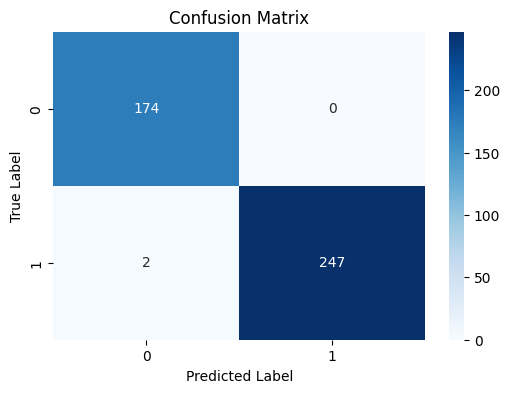

<ipython-input-1-39814d593cc9>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=selected_features, palette="viridis")


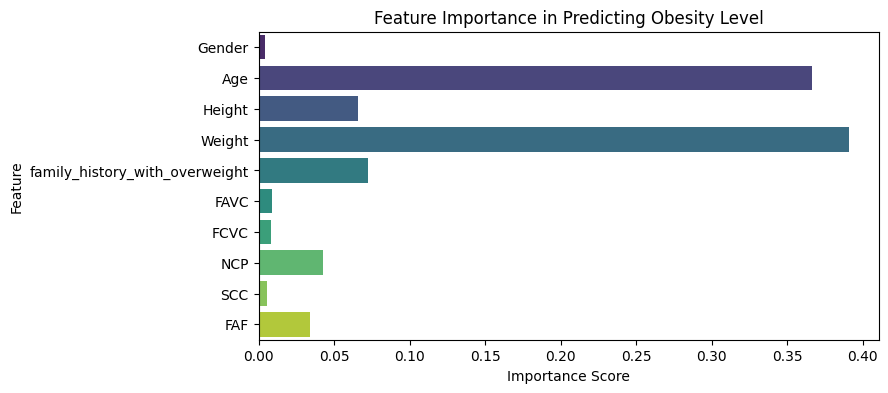

In [1]:
#objective 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files


uploaded = files.upload()



file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)


label_encoder = LabelEncoder()
df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])


# Select relevant features for dietary habits, family history, and lifestyle
selected_features = ["Gender", "Age", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "SCC", "FAF"]
df[selected_features] = df[selected_features].apply(LabelEncoder().fit_transform)  # Encode categorical features


# Split dataset into features (X) and target (y)
X = df[selected_features]  # Features
y = df["NObeyesdad"]  # Target: Obesity Level


# Train-Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Make predictions
y_pred = rf_model.predict(X_test)


# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Feature Importance Visualization
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance, y=selected_features, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Obesity Level")
plt.show()
